In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import sklearn.preprocessing
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import wrangle





## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
# get the data
df = wrangle.get_zillow_data()

In [3]:
# aquired data
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [4]:
# Check data to ensure it is all continuous data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusetypeid         float64
dtypes: float64(8)
memory usage: 131.4 MB


In [5]:
df = wrangle.prep_zillow(df)

In [6]:
# Split the datasets
train, validate, test = wrangle.split_zillow(df)

In [7]:
# check it out
print(f"train: {train.shape}")
print(f"validate: {validate.shape}")
print(f"test: {test.shape}")

train: (1278128, 7)
validate: (426043, 7)
test: (426043, 7)


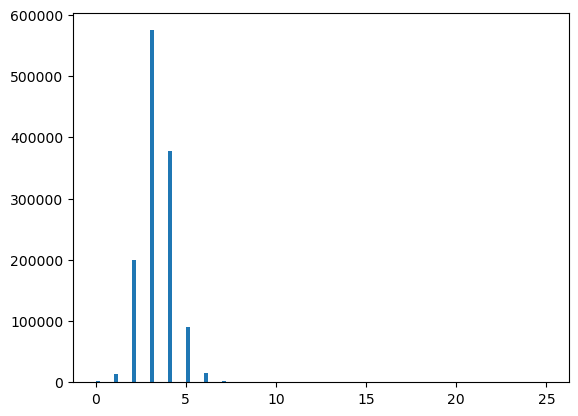

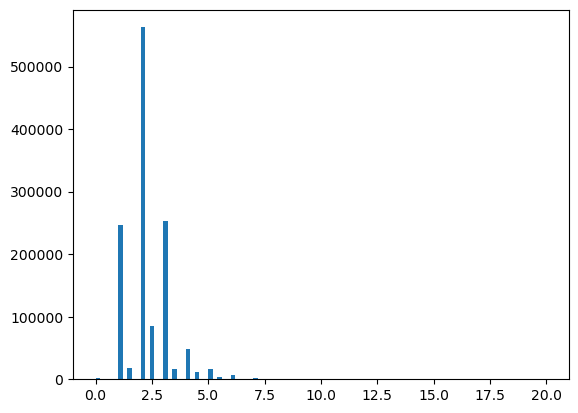

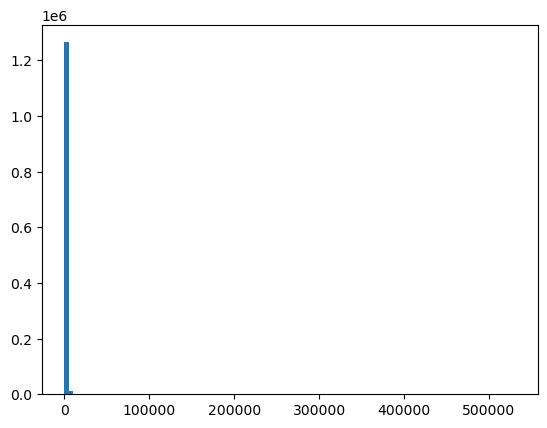

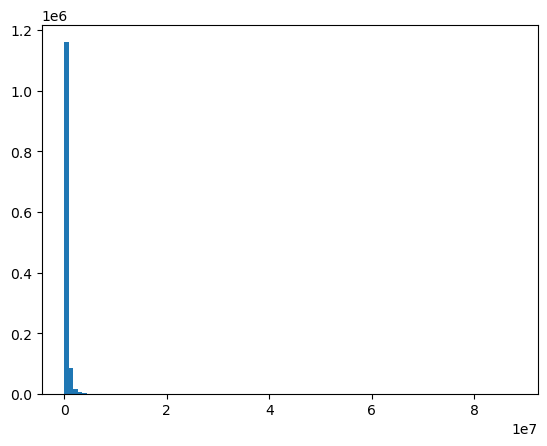

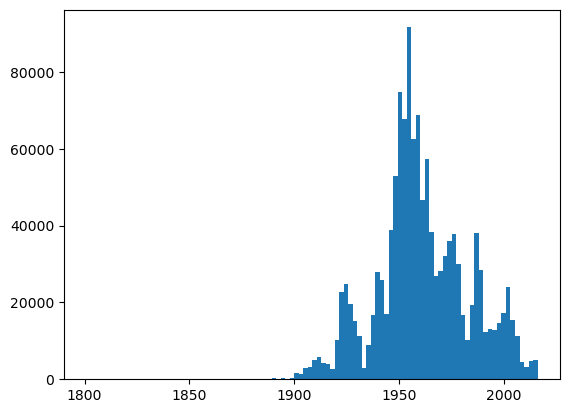

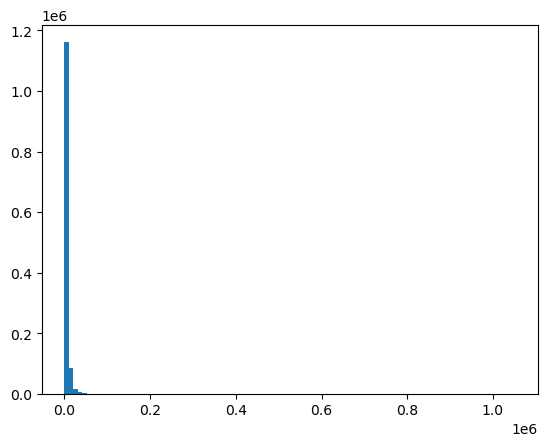

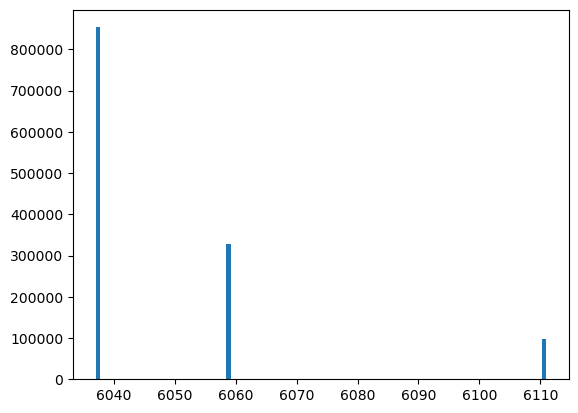

In [8]:
# visualize before scaling
for col in train.columns:
    plt.figure()
    plt.hist(train[col], bins=100)

In [9]:
#scaling fit
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [10]:
train_scaled = pd.DataFrame(train_scaled)

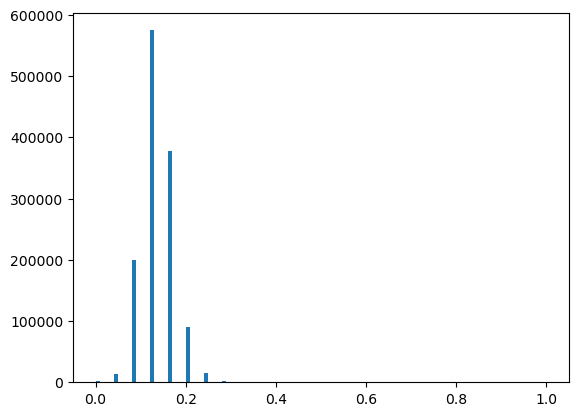

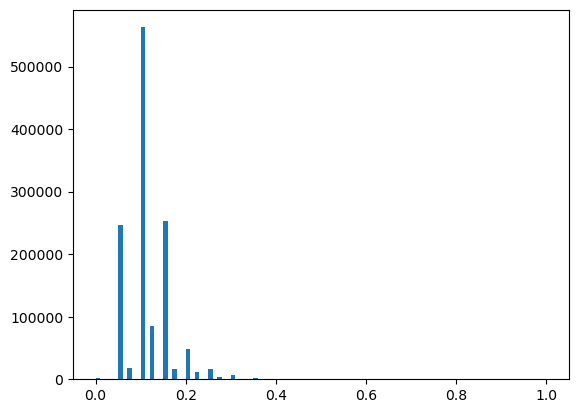

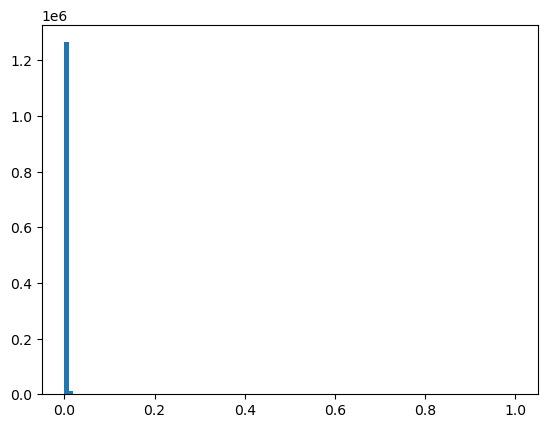

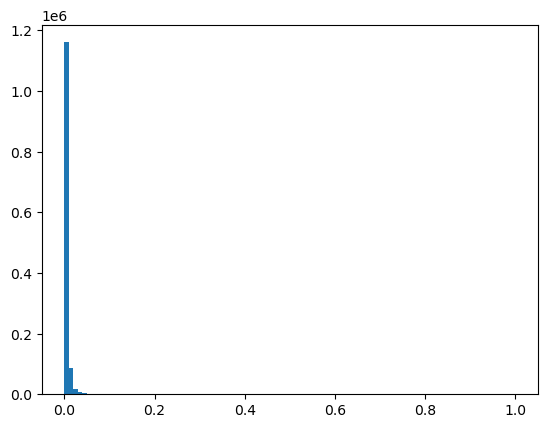

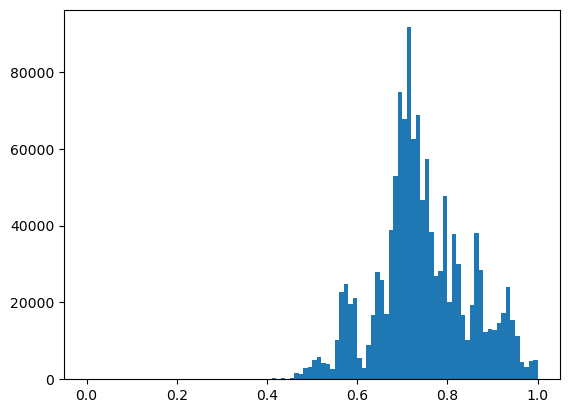

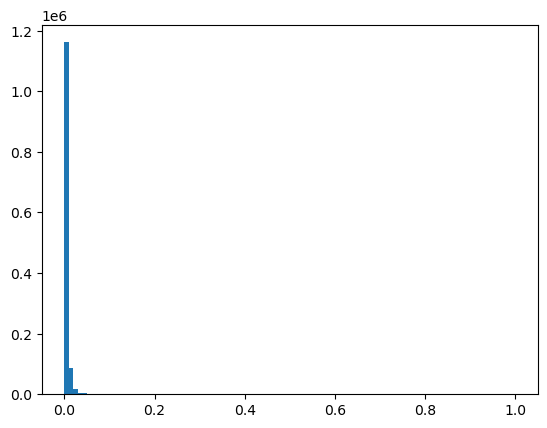

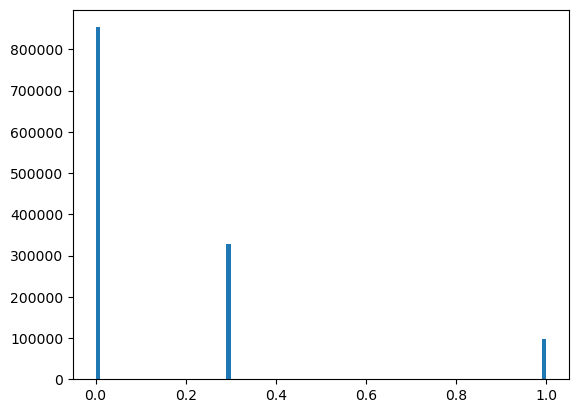

In [11]:
# visualize the scaled data
for col in train_scaled.columns:
    plt.figure()
    plt.hist(train_scaled[col], bins=100)


## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [12]:
# inverse transform

train_inverse_scaled = scaler.inverse_transform(train_scaled)
validate_inverse_scaled = scaler.inverse_transform(validate_scaled)
test_inverse_scaled = scaler.inverse_transform(test_scaled)

In [13]:
train_inverse_scaled = pd.DataFrame(train_inverse_scaled)

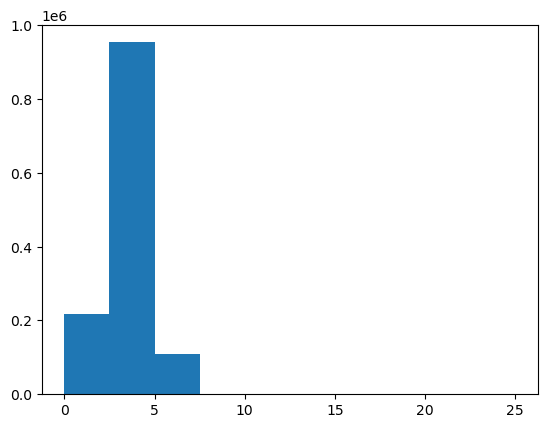

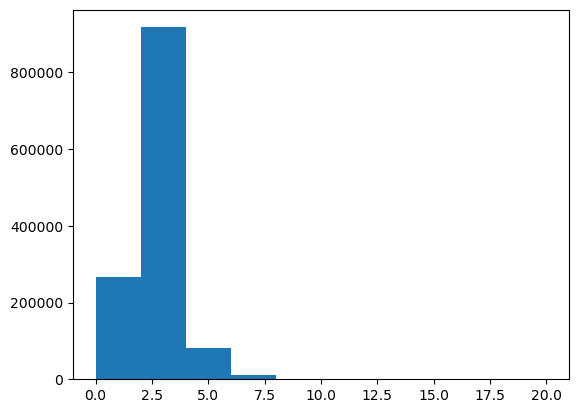

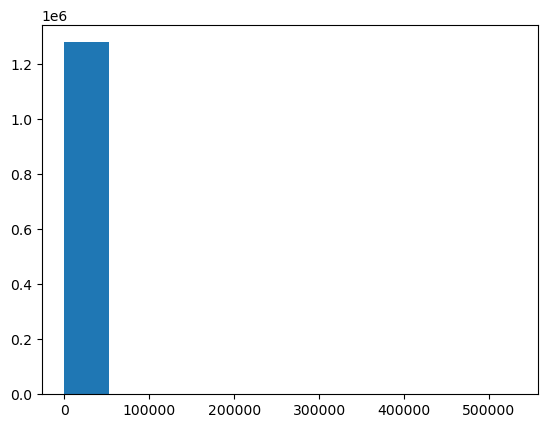

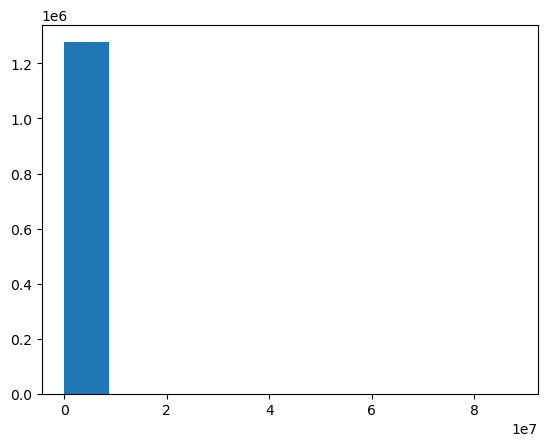

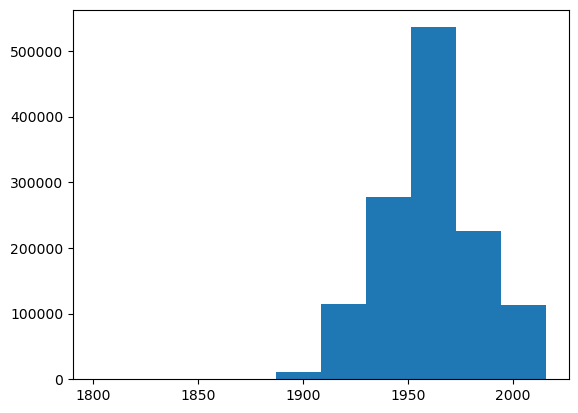

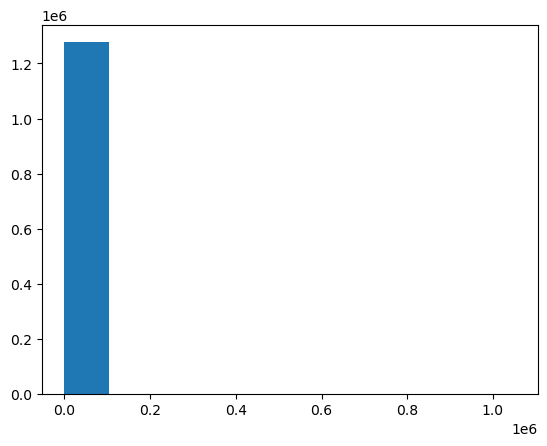

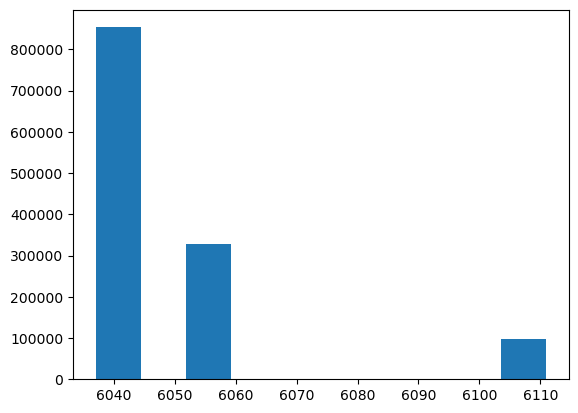

In [14]:
# visualize the scaled data
for col in train_inverse_scaled.columns:
    plt.figure()
    plt.hist(train_inverse_scaled[col])

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [15]:
# quantile transformer
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

train_quantile_scaled = qt.fit_transform(train)
validate_quantile_scaled = qt.transform(validate)
test_quantile_scaled = qt.transform(test)



In [16]:
train_quantile_scaled = pd.DataFrame(train_quantile_scaled)

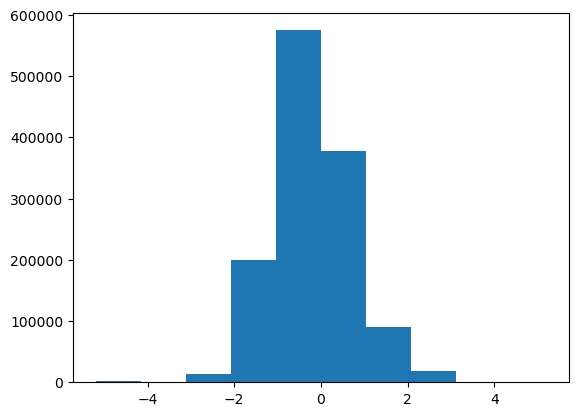

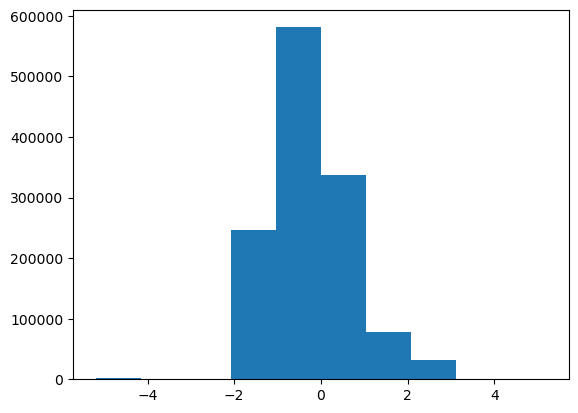

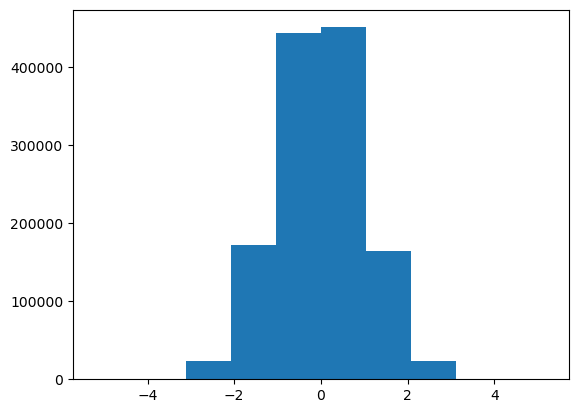

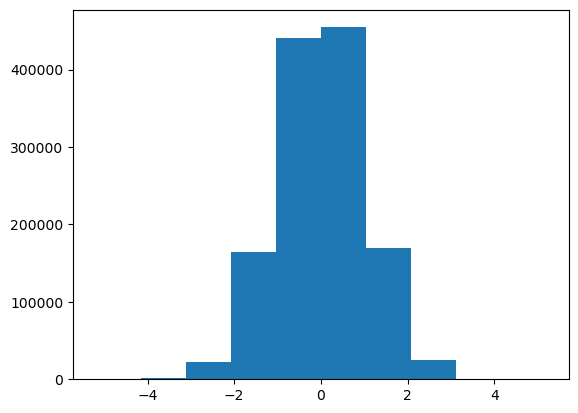

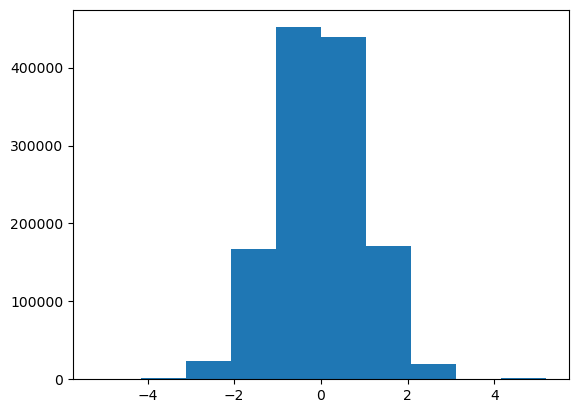

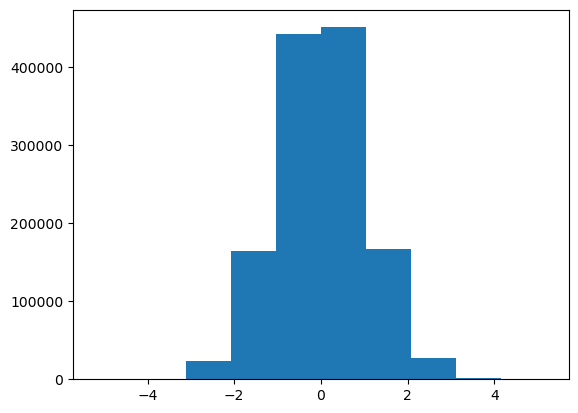

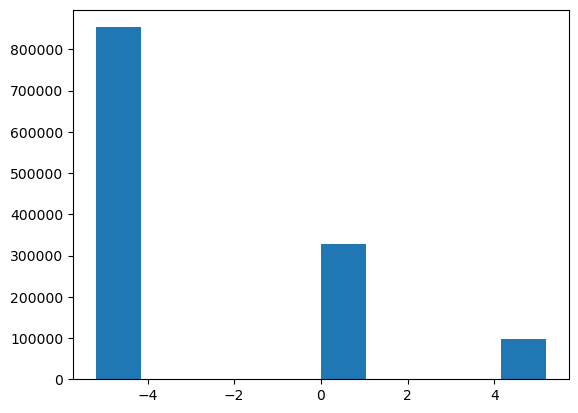

In [17]:
# visualize the scaled data
for col in train_quantile_scaled.columns:
    plt.figure()
    plt.hist(train_quantile_scaled[col])

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [18]:
# quantile transformer
qt = sklearn.preprocessing.QuantileTransformer()

train_quantile_scaled = qt.fit_transform(train)
validate_quantile_scaled = qt.transform(validate)
test_quantile_scaled = qt.transform(test)


In [19]:
train_quantile_scaled = pd.DataFrame(train_quantile_scaled)

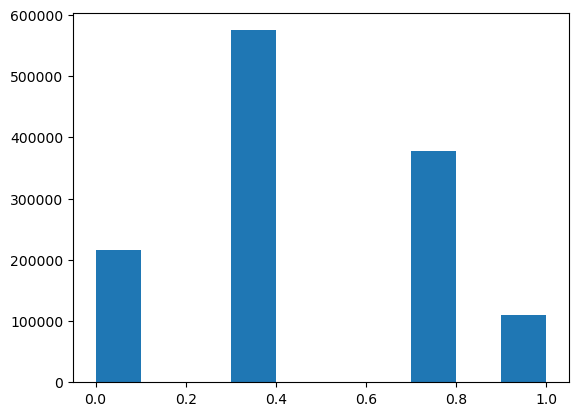

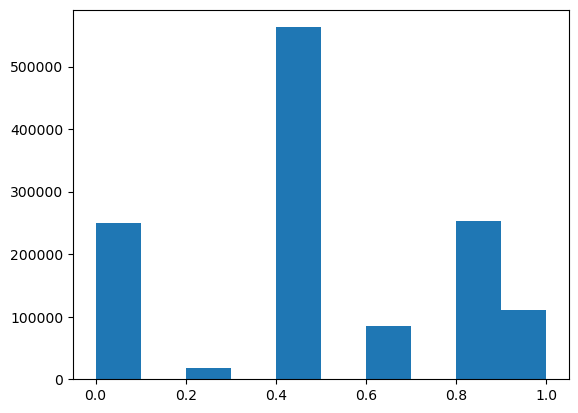

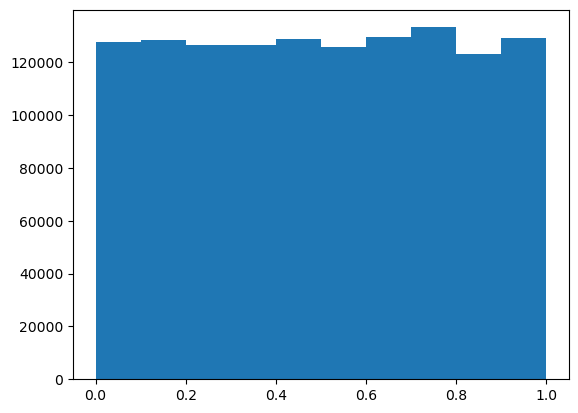

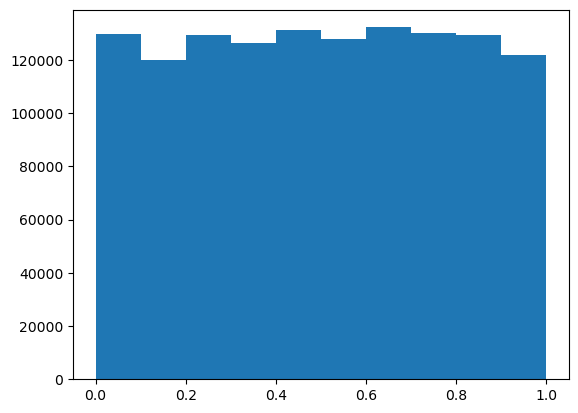

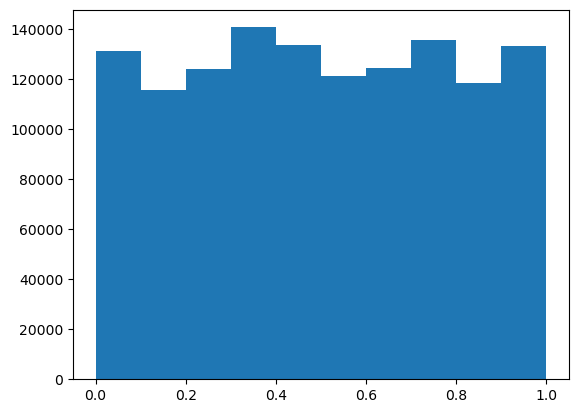

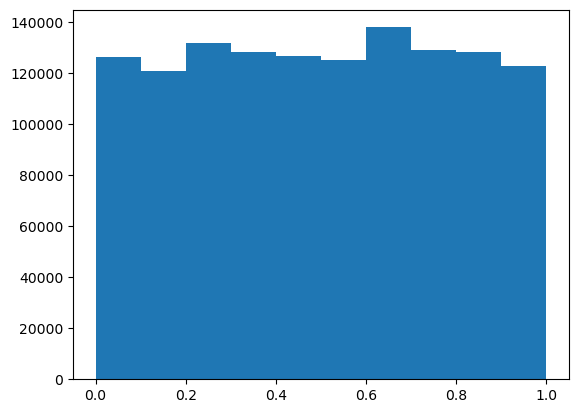

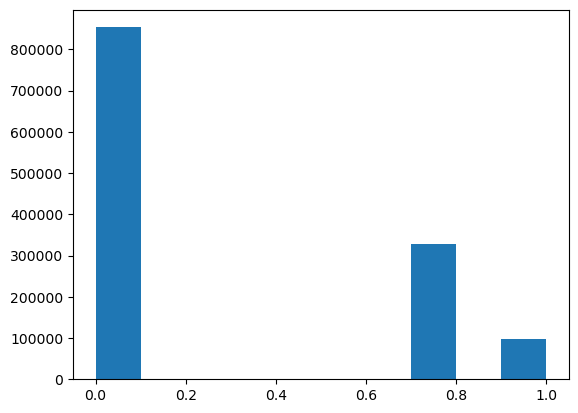

In [20]:
# visualize the scaled data
for col in train_quantile_scaled.columns:
    plt.figure()
    plt.hist(train_quantile_scaled[col])

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [21]:
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
125378,3.0,1.0,1448.0,155750.0,1952.0,2060.35,6037.0
290723,3.0,2.0,1232.0,272442.0,1962.0,3199.46,6059.0
756355,4.0,3.0,2192.0,191403.0,1941.0,2705.67,6037.0
1906573,5.0,4.0,3787.0,470587.0,1958.0,5909.74,6037.0
1285391,3.0,2.0,1822.0,415591.0,1927.0,5082.56,6037.0


In [23]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #duplicate data for scaling
    train_scaled = train.copy()
    validate_scaled = test.copy()
    test_scaled = test.copy()

    #Make Scaler MinMax
    scaler = MinMaxScaler()

    #Fit Scaler
    scaler.fit(train[to_scale])

    #Use Scaler
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [24]:
#check data
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
125378,3.0,1.0,1448.0,155750.0,1952.0,2060.35,6037.0
290723,3.0,2.0,1232.0,272442.0,1962.0,3199.46,6059.0
756355,4.0,3.0,2192.0,191403.0,1941.0,2705.67,6037.0
1906573,5.0,4.0,3787.0,470587.0,1958.0,5909.74,6037.0
1285391,3.0,2.0,1822.0,415591.0,1927.0,5082.56,6037.0


In [25]:
train_scaled.head()

,0,1,2,3,4,5,6
0,0.12,0.05,0.002724,0.001769,0.702326,0.001952,0.000000
1,0.12,0.10,0.002318,0.003095,0.748837,0.003035,0.297297
2,0.16,0.15,0.004125,0.002174,0.651163,0.002566,0.000000
3,0.20,0.20,0.007128,0.005346,0.730233,0.005611,0.000000
4,0.12,0.10,0.003429,0.004721,0.586047,0.004825,0.000000
